# Fibonacci sequence
_Gilbert François Duivesteijn_


## Abstract

This notebook explores the Fibonacci numbers in more depth, and shows that the sequence is related to the golden ratio. More over, the Fibonacci numbers can be exteded from a discrete series of natural numbers, to a continuous function in the complex plane. The latter shows that all the discrete series are a subset of the generic continuous function in the complex plane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def plot(x):
    """
    Plots the sequence on the 1D number line.
    
    Parameter
    ---------
    x: np.ndarray
        Sequence of numbers
    """
    plt.figure(figsize=(9,0.5))
    plt.scatter(x=x, y=np.zeros_like(x), marker='o', color="black")
    plt.xlim([x.min()-1, x.max()+1])
    plt.ylim([-10, 10])
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax = plt.gca()
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

## Fibonacci in $\mathbb{N}$

The Fibonacci numbers may be defined by the recurrence relation:

\begin{align}
F_0 &= 0 \\
F_1 &= 1 \\
F_i &= F_{i-2} + F_{i-1} \qquad i \in \mathbb{N}, i \geq 2
\end{align}

In [3]:
def fibonacci(F0, F1, n, dtype=int):
    """
    Computes Fibonacci sequence in positive direction.
    
    Parameters
    ----------
    F0: int|float
        First starting number
    F1: int|float
        Second starting number
    n: int
        number of digits in the sequence.
    dtype: dtype (optional)
        int or float
    
    Returns
    -------
    np.ndarray
        Sequence
    """
    seq = np.zeros(shape=(n,), dtype=dtype)
    seq[0] = F0
    seq[1] = F1
    for i in range(2, n):
        seq[i] = seq[i-2] + seq[i-1]
    return np.array(seq)

[ 0  1  1  2  3  5  8 13 21 34]


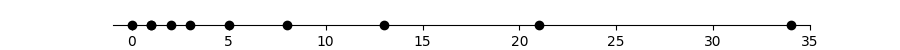

In [4]:
seq = fibonacci(0, 1, 10)

plot(seq)
print(seq)

## Fibonacci in $\mathbb{Z}$

The Fibonacci numbers may be defined by the recurrence relation:

\begin{align}
F_{i-2} &= -F_{i-1} + F_{i} \qquad i \in \mathbb{Z}
\end{align}



In [5]:
def fibonacci_rev(F0, F1, n, dtype=int):
    """
    Computes Fibonacci sequence in negative direction.
    
    Parameters
    ----------
    F0: int|float
        First starting number
    F1: int|float
        Second starting number
    n: int
        number of digits in the sequence.
    dtype: dtype (optional)
        int or float
    
    Returns
    -------
    np.ndarray
        Sequence
    """

    seq = np.zeros(shape=(n,), dtype=dtype)
    seq[n-2] = F0
    seq[n-1] = F1
    for i in range(n-1, 1, -1):
        seq[i-2] = - seq[i-1] + seq[i]
    return np.array(seq)

[-21  13  -8   5  -3   2  -1   1   0   1]


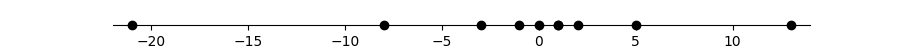

In [6]:
seq = fibonacci_rev(0, 1, 10)

plot(seq)
print(seq)

## Fibonacci in $\mathbb{R}$

[  2.2   3.3   5.5   8.8  14.3  23.1  37.4  60.5  97.9 158.4]


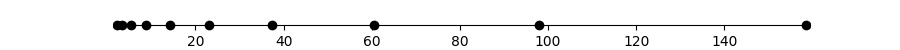

In [7]:
seq = fibonacci(2.2, 3.3, 10, dtype=float)

plot(seq)
print(seq)

## Golden ratio


\begin{align}
\frac{F_{i}}{F_{i-1}} &= \frac{F_{i-1}}{F_{i-2}} = \phi\\
\end{align}

with 

\begin{align}
F_i &= F_{i-2} + F_{i-1}
\end{align}

we can write

\begin{align}
\frac{F_{i-1}+F_{i-2}}{F_{i-1}} &= \frac{F_{i-1}}{F_{i-2}} \\
1+\frac{F_{i-2}}{F_{i-1}} &= \frac{F_{i-1}}{F_{i-2}} \\
\end{align}

Recall that $\frac{F_{i-1}}{F_{i-2}}=\phi$, the equation becomes
\begin{align}
1 + \frac{1}{\phi} = \phi
\end{align}

There are many methods to obtain the solution for $\phi$. Here we will use the quadratic formula. 

Multiply both sides with $\phi$:
\begin{align}
\phi + 1 = \phi^2
\end{align}

Rearrange to
\begin{align}
\phi^2 - \phi -1 = 0
\end{align}

and use the quadratic formula to solve $\phi$:
\begin{align}
\phi = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
\end{align}

With $a=1$, $b=-1$ and $c=-1$:
\begin{align}
\phi = \frac{1}{2} \pm \frac{\sqrt{5}}{2}
\end{align}



In positive direction:
\begin{align}
\phi &= \lim_{i \rightarrow \infty} \frac{F_{i+1}}{F_i} \qquad i \in [0, \infty) \\
     &= 1.618033988749895\cdots
\end{align}

In negative direction:
\begin{align}
\psi &= \lim_{i \rightarrow -\infty} \frac{F_{i+1}}{F_{i}} \qquad i \in (-\infty, 0] \\
     &= -0.6180339887498948\cdots \\
     &= -\frac{1}{\phi}
\end{align}


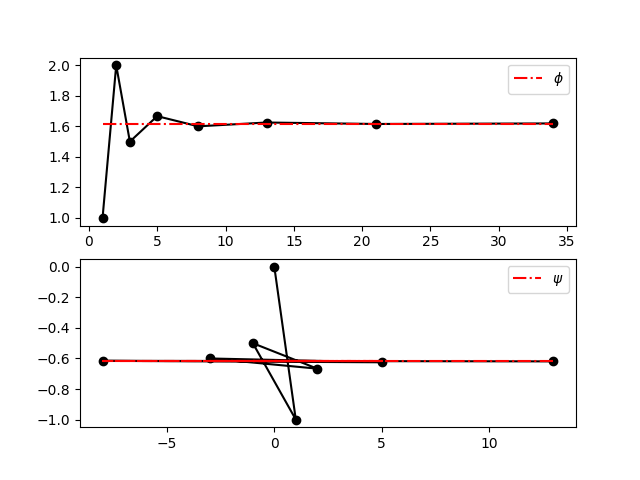

In [8]:
phi = (1 + np.sqrt(5))/2
psi = (1 - np.sqrt(5))/2

seq_pos = fibonacci(1, 1, 9)
ratio_pos = seq_pos[1:]/seq_pos[:-1] 

seq_neg = fibonacci_rev(1, 0, 9)
ratio_neg = seq_neg[1:]/(seq_neg[:-1]) 

fig, axs = plt.subplots(2, 1)
axs[0].plot(seq_pos[1:], ratio_pos, marker='o', color="black")
axs[0].plot(seq_pos[1:], np.ones_like(seq_pos[1:])*phi, "-.", color="red", label="$\phi$")
axs[1].plot(seq_neg[1:], ratio_neg, marker='o', color="black")
axs[1].plot(seq_neg[1:], np.ones_like(seq_neg[1:])*psi, "-.", color="red", label="$\psi$")
axs[0].legend()
axs[1].legend()
plt.show()


## Fibonacci in $\mathbb{C}$

With help of Binet's formula
\begin{align}
F_i &= \frac{\phi^i - \psi^i}{\phi - \psi} \\
\end{align}

we can find any $i$-th Fibonacci number. 

In [9]:
phi = (1 + np.sqrt(5))/2
psi = (1 - np.sqrt(5))/2

In [10]:
def binet(i):
    """
    Binet's function
    
    Parameter
    ---------
    i: int|float
        Requesting i-th digit in the fibonacci sequence.
        
    Returns
    -------
    int|float
        i_th Fibonacci number
    """
    Fi = (np.power(phi, i) - np.power(psi,i))/(phi - psi)
    return Fi

Example: Let's find the 7th Fibonacci number with Binet's formula:

In [11]:
binet(7)

13.000000000000002

However, this only works for $i \in \mathbb{Z}$, not for $i \in \mathbb{R}$. Recall that $\psi = \frac{-1}{\phi}$ and computing the power of a number with a fractional exponent, is effectively taking a square root of a number. The square root of a negative number does not exist, unless we allow complex numbers, where 

\begin{align}
j^2 &= -1\\
j &= \sqrt{-1}
\end{align}

Let's compute the 1.1th Fibonacci number. To make it work in Numpy, we have to fill in a complex number for $n$, where $n = 1.1 + 0j$ or $\Re{(n)} = 1.1, \Im{(n)}=0$:

In [12]:
binet(1.1+0j)

(1.009794706934108+0.0813974796159386j)

---
Find _all_ values of $F_i$, $i \in [0, \infty)$:

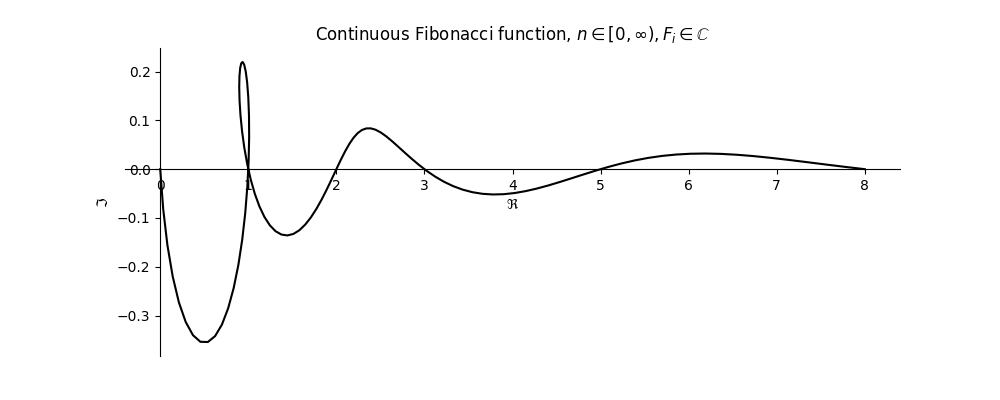

In [13]:
x = np.linspace(0, 6, 101)
x = x + 0j
y = binet(x)

plt.figure(figsize=(10,4))
plt.plot(np.real(y), np.imag(y), color="black")
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel("$\Re$")
plt.ylabel("$\Im$")
plt.title("Continuous Fibonacci function, $n \in [0, \infty), F_i \in \mathbb{C}$")
plt.show()

Note that on the $\Re$ axis, we find all the Fibonacci numbers in $\mathbb{N}$, as shown in section "Fibonacci in $\mathbb{N}$", namely $0, 1, 1, 2, 3, 5, 8, \cdots$.

---
Find _all_ values of $F_i$, $i \in (-\infty, 0]$:

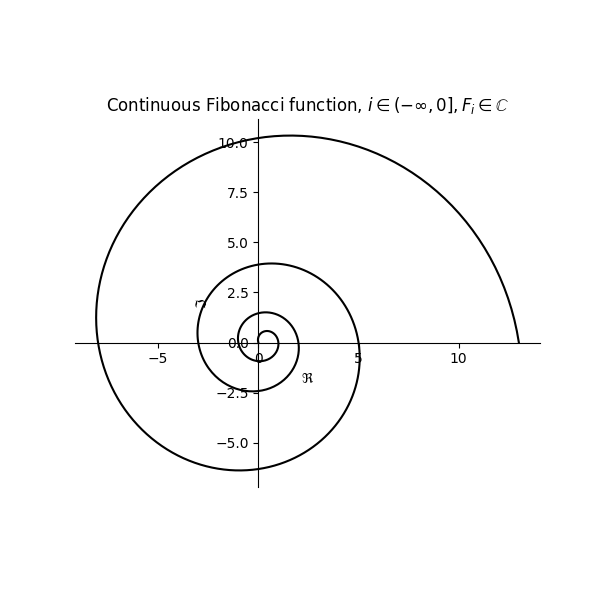

In [14]:
x = np.linspace(-7, 0, 501)
x = x + 0j
y = binet(x)

plt.figure(figsize=(6,6))
plt.plot(np.real(y), np.imag(y), color="black")
ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel("$\Re$")
plt.ylabel("$\Im$")
plt.title("Continuous Fibonacci function, $i \in (-\infty, 0], F_i \in \mathbb{C}$")
plt.show()

Note that on the $\Re$ axis, we find all the Fibonacci numbers in $\mathbb{Z}$, as shown in section "Fibonacci in $\mathbb{Z}$", namely $0, 1, -1, 2, -3, 5, -8, 13, \cdots$.